<a href="https://colab.research.google.com/github/JayV1I/Aulas-pucc/blob/main/C%C3%B3pia_de_Synchronous_Label_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# [João Vitor] - RA: [23007781]
# [Rafael Mateus] - RA: [23010763]
# [Raphael Bento] - RA: [23002292]

#Bibliotecas importadas
import networkx as nx
import matplotlib.pyplot as plt
import random
import collections

#Definindo variáveis para os grafos com os respectivos caminhos
dolphins = '/content/dolphins.gml'
karate = '/content/karate.gml'
netscience = '/content/netscience.gml'

#Criando os grafos com a biblioteca networkx, onde o label define o identificador de cada nó como o campo "id" e o destringizer substitui valores strings por valores int
grafoDolphins = nx.read_gml(dolphins, label='id', destringizer=int)
grafoKarate = nx.read_gml(karate, label='id', destringizer=int)
grafoNetscience = nx.read_gml(netscience, label='id', destringizer=int)

#Printando os grafos para validar se foram devidamente criados, apenas algo para evitar problemas
print(grafoDolphins)
print(grafoKarate)
print(grafoNetscience)

Graph with 62 nodes and 159 edges
Graph with 34 nodes and 78 edges
Graph with 1589 nodes and 2742 edges


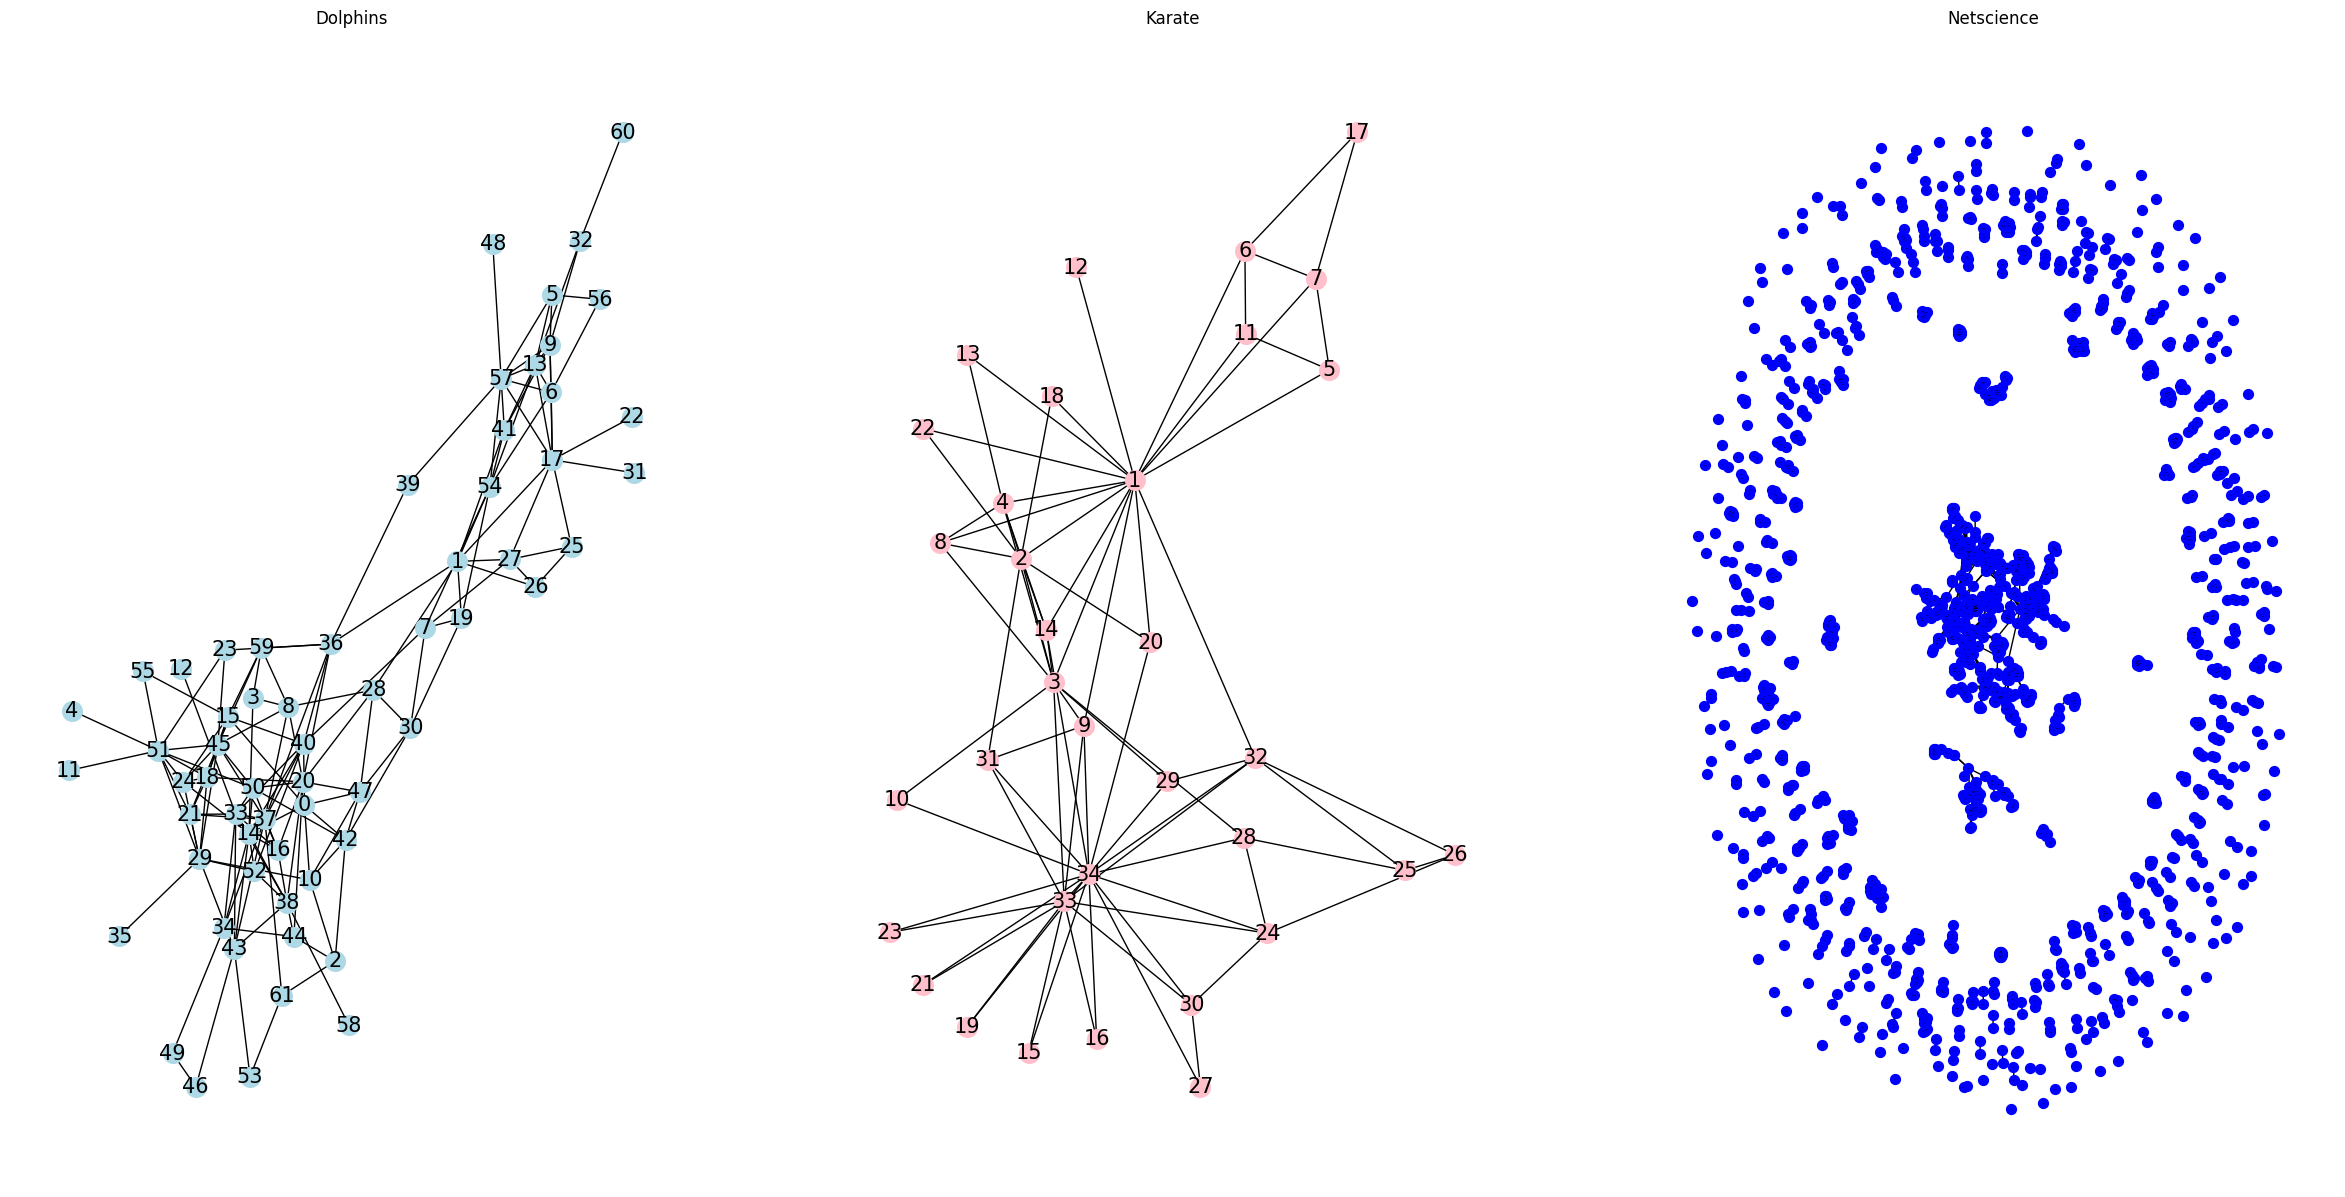

In [ ]:
#Agora vamos plotar os grafos
#Vamos começar criando uma figura onde os grafos irão se relacionar
plt.figure(figsize=(30, 15))

#Aqui nós definimos a posição dos grafos dentro do plot, o spring layout já foi utilizado por nós outras vezes, os outros layouts nos pareceram confusos
posicaoDolphins = nx.spring_layout(grafoDolphins, seed=42)
posicaoKarate = nx.spring_layout(grafoKarate, seed= 42)
posicaoNetscience = nx.spring_layout(grafoNetscience, seed=42)

#Plotamos os 3 grafos, deixei o tamanho da figure grande devido ao grafo Netscience, ele estava muito apertado no (10,8), além de que, diminuí a fonte do pois estava impossível de se ver
plt.subplot(131)
nx.draw(grafoDolphins, posicaoDolphins, with_labels=True, node_size=200, node_color='lightblue', font_size=15)
plt.title("Dolphins")
plt.subplot(132)
nx.draw(grafoKarate, posicaoKarate, with_labels=True, node_size=200, node_color='pink', font_size=15)
plt.title("Karate")
plt.subplot(133)
nx.draw(grafoNetscience, posicaoNetscience, with_labels=True, node_size=50, node_color='blue', font_size=0.1)
plt.title("Netscience")
plt.show()

In [ ]:
#Agora vamos começar o Label Propagation de maneira síncrona, ou seja, a análise dos relacionamentos é simultânea para todos os nós!
#Como estamos falando desse modelo, os rótulos dos nós devem ser aleatórios

#Aqui estamos listando os nós para rotulá-los conforme o modelo manda
nosDolphins = list(grafoDolphins.nodes())
nosKarate = list(grafoKarate.nodes())
nosNetscience = list(grafoNetscience.nodes())

#Listando os nós únicos
possibilidadesNosDolphins = list(range(len(nosDolphins)))
possibilidadesNosKarate = list(range(len(nosKarate)))
possibilidadesNosNetscience = list(range(len(nosNetscience)))

#Agora vamos embaralhá-los
random.shuffle(possibilidadesNosDolphins)
random.shuffle(possibilidadesNosKarate)
random.shuffle(possibilidadesNosNetscience)

In [ ]:
#Agora vamos, através de um dicionário, definir os rótulos aleatórios definidos acima, para cada nó
#Essa atribuição é feita através de um emparelhamento da sequencia do nó com o rótulo gerado aleatoriamente
rotulosAleatoriosDolphins = {noDolphins2: rotuloDolphins for noDolphins2, rotuloDolphins in zip(list(grafoDolphins.nodes()), possibilidadesNosDolphins)} # Change: Use list(grafoDolphins.nodes()) instead of nosDolphins
nx.set_node_attributes(grafoDolphins, rotulosAleatoriosDolphins, 'label')
rotulosAleatoriosKarate = {nosKarate2: rotuloKarate for nosKarate2, rotuloKarate in zip(nosKarate, possibilidadesNosKarate)} # Change: Use nosKarate2 instead of nosKarate
nx.set_node_attributes(grafoKarate, rotulosAleatoriosKarate, 'label')
rotulosAleatoriosNetscience = {nosNetscience2: rotuloNetscience for nosNetscience2, rotuloNetscience in zip(nosNetscience, possibilidadesNosNetscience)} # Change: Use nosNetscience2 instead of nosNetscience
nx.set_node_attributes(grafoNetscience, rotulosAleatoriosNetscience, 'label')

In [ ]:
#Vamos verificar se as alterações de inicialização estão configuradas
print("Dolphins")
for no in grafoDolphins.nodes():
    print("Nó", no, "Rótulo", grafoDolphins.nodes[no]['label'])
print("Karate")
for no2 in grafoKarate.nodes():
    print("Nó", no2, "Rótulo", grafoKarate.nodes[no2]['label'])
print("Netscience")
for no3 in grafoNetscience.nodes():
    print("Nó", no3, "Rótulo", grafoNetscience.nodes[no3]['label'])

Dolphins
Nó 0 Rótulo 10
Nó 1 Rótulo 20
Nó 2 Rótulo 0
Nó 3 Rótulo 12
Nó 4 Rótulo 35
Nó 5 Rótulo 31
Nó 6 Rótulo 30
Nó 7 Rótulo 11
Nó 8 Rótulo 41
Nó 9 Rótulo 32
Nó 10 Rótulo 28
Nó 11 Rótulo 14
Nó 12 Rótulo 49
Nó 13 Rótulo 21
Nó 14 Rótulo 18
Nó 15 Rótulo 29
Nó 16 Rótulo 47
Nó 17 Rótulo 3
Nó 18 Rótulo 57
Nó 19 Rótulo 61
Nó 20 Rótulo 39
Nó 21 Rótulo 43
Nó 22 Rótulo 54
Nó 23 Rótulo 4
Nó 24 Rótulo 7
Nó 25 Rótulo 8
Nó 26 Rótulo 60
Nó 27 Rótulo 38
Nó 28 Rótulo 6
Nó 29 Rótulo 26
Nó 30 Rótulo 40
Nó 31 Rótulo 42
Nó 32 Rótulo 48
Nó 33 Rótulo 17
Nó 34 Rótulo 24
Nó 35 Rótulo 37
Nó 36 Rótulo 19
Nó 37 Rótulo 52
Nó 38 Rótulo 22
Nó 39 Rótulo 15
Nó 40 Rótulo 23
Nó 41 Rótulo 50
Nó 42 Rótulo 33
Nó 43 Rótulo 1
Nó 44 Rótulo 53
Nó 45 Rótulo 58
Nó 46 Rótulo 13
Nó 47 Rótulo 51
Nó 48 Rótulo 5
Nó 49 Rótulo 2
Nó 50 Rótulo 27
Nó 51 Rótulo 25
Nó 52 Rótulo 56
Nó 53 Rótulo 55
Nó 54 Rótulo 44
Nó 55 Rótulo 46
Nó 56 Rótulo 45
Nó 57 Rótulo 34
Nó 58 Rótulo 9
Nó 59 Rótulo 16
Nó 60 Rótulo 36
Nó 61 Rótulo 59
Karate
Nó 1 Rótulo 

In [ ]:
#Agora que a inicialização está pronto, precisamos fazer com que os nós olhem para seus vizinhos e absorvam seus rótulos
#Vamos agora, fazer com que cada nó tenha uma lista de seus vizinhos e de seus respectivos rótulos
iteracoes = 100
for c in range(iteracoes):
    mudou = False
    for no in grafoDolphins.nodes():
        vizinhos = list(grafoDolphins.neighbors(no))
        if not vizinhos:
            continue
        rotulosVizinhos = [rotulosAntigosDolphins[v] for v in vizinhos]
        contador = collections.Counter(rotulosVizinhos)
        rotuloComum = contador.most_common(1)[0][0]
        if grafoDolphins.nodes[no]['label'] != rotuloComum:
            grafoDolphins.nodes[no]['label'] = rotuloComum
            mudou = True
    if not mudou:
        print(f"Convergência em Dolphin na iteração {c+1}")
        break
    rotulosAntigosDolphins = {
        no: grafoDolphins.nodes[no]['label']
        for no in grafoDolphins.nodes()
    }

In [ ]:
iteracoes = 150
for c in range(iteracoes):
    mudou = False
    for no in grafoKarate.nodes():
        vizinhos = list(grafoKarate.neighbors(no))
        if not vizinhos:
            continue
        rotulosVizinhos = [rotulosAntigosKarate[v] for v in vizinhos]
        contador = collections.Counter(rotulosVizinhos)
        rotuloComum = contador.most_common(1)[0][0]
        if grafoKarate.nodes[no]['label'] != rotuloComum:
            grafoKarate.nodes[no]['label'] = rotuloComum
            mudou = True
    if not mudou:
        print(f"Convergência em Karate na iteração {c+1}")
        break
    rotulosAntigosKarate = {
        no: grafoKarate.nodes[no]['label']
        for no in grafoKarate.nodes()
    }

Convergência em Netscience na iteração 1


In [ ]:
iteracoes = 1000
for c in range(iteracoes):
    mudou = False
    for no in grafoNetscience.nodes():
        vizinhos = list(grafoNetscience.neighbors(no))
        if not vizinhos:
            continue
        rotulosVizinhos = [rotulosAntigosNetscience[v] for v in vizinhos]
        contador = collections.Counter(rotulosVizinhos)
        rotuloComum = contador.most_common(1)[0][0]
        if grafoNetscience.nodes[no]['label'] != rotuloComum:
            grafoNetscience.nodes[no]['label'] = rotuloComum
            mudou = True
    if not mudou:
        print(f"Convergência em Netscience na iteração {c+1}")
        break
    rotulosAntigosNetscience = {
        no: grafoNetscience.nodes[no]['label']
        for no in grafoNetscience.nodes()
    }

Convergência em Netscience na iteração 1


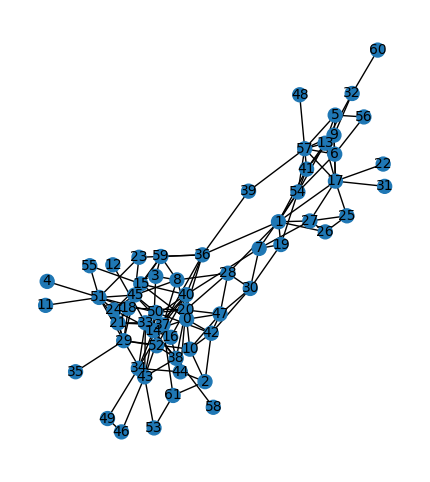

In [ ]:
plt.figure(figsize=(18, 6))

rotulosDolphins = [grafoDolphins.nodes[no]['label'] for no in grafoDolphins.nodes()]
novaPosicaoDolphins = nx.spring_layout(grafoDolphins, seed=42)

plt.subplot(131)
nx.draw(grafoDolphins,novaPosicaoDolphins,with_labels=True,node_size=100,node_color=rotulosDolphins,cmap=plt.cm.tab20,font_size=10)
plt.show()

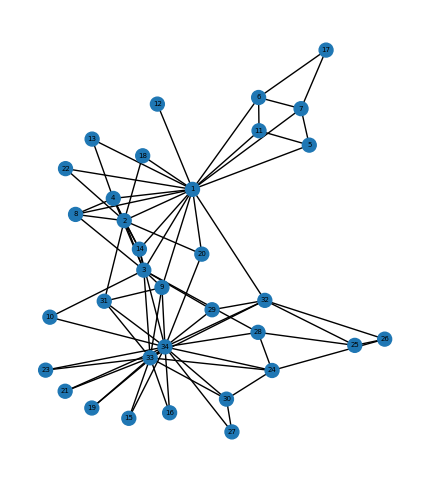

In [ ]:
plt.figure(figsize=(18, 6))

rotulosKarate = [grafoKarate.nodes[no]['label'] for no in grafoKarate.nodes()]
novaPosicaoKarate = nx.spring_layout(grafoKarate, seed=42)

plt.subplot(131)
nx.draw(grafoKarate,novaPosicaoKarate,with_labels=True,node_size=100,node_color=rotulosKarate,cmap=plt.cm.tab20,font_size=5)
plt.show()

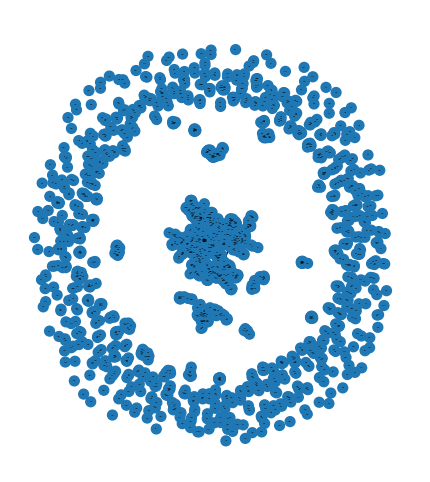

In [ ]:
plt.figure(figsize=(18, 6))

rotulosNetscience = [grafoNetscience.nodes[no]['label'] for no in grafoNetscience.nodes()]
novaPosicaoNetscience = nx.spring_layout(grafoNetscience, seed=42)

plt.subplot(131)
nx.draw(grafoNetscience,novaPosicaoNetscience,with_labels=True,node_size=50,node_color=rotulosNetscience,cmap=plt.cm.tab20,font_size=0.1)
plt.show()